In [18]:
# Notebook for testing the GWB

from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', font_scale=1.5, rc={"figure.figsize":(8,5)})

# Test plots

In [2]:
l_max = 1000
common_settings = {
    'output':'gwCl',
    # 'output':'gwCl',
    # 'gravitational_wave_contributions': 'tsw, eisw, lisw',
    'gravitational_wave_contributions': 'tsw',
    'tau_ini_gwb':'1e-2',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()

M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)

In [3]:
M.raw_cl()

{'gwb': array([0.00000000e+00, 0.00000000e+00, 1.29458246e-09, ...,
        5.79307155e-15, 5.78016525e-15, 5.76730435e-15]),
 'ell': array([   0,    1,    2, ...,  998,  999, 1000])}

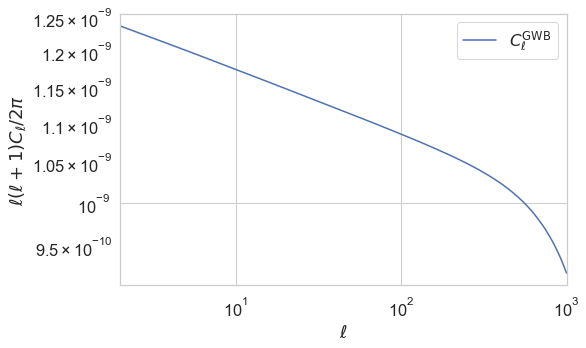

In [4]:
plt.figure()
plt.xlim([2,l_max])
plt.xscale('log');plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")

ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
plt.plot(ell,factor*cl['gwb'],label=r'$C_\ell^\mathrm{GWB}$')
# plt.plot(ell,factor*cl['tt'],label=r'$C_\ell^\mathrm{TT}$')
# plt.plot(ell,factor*cl['tgwb'],label=r'$C_\ell^\mathrm{TGWB}$')

plt.legend()

No handles with labels found to put in legend.


dict_keys(['k [1/Mpc]', 'P_scalar(k)'])


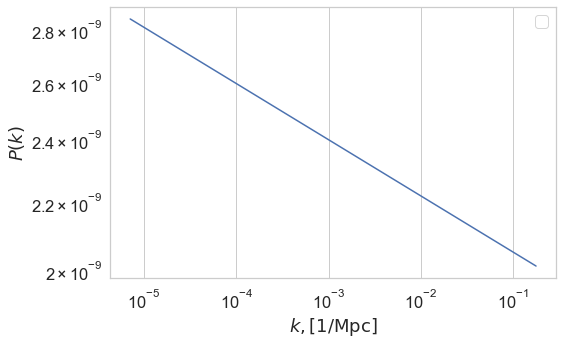

In [5]:
prim = M.get_primordial()
print(prim.keys())

plt.figure()
plt.xlabel(r"$k , [1/\mathrm{Mpc}]$")
plt.ylabel(r"$P(k)$")

plt.plot(prim['k [1/Mpc]'], prim['P_scalar(k)'])

plt.xscale('log')
plt.yscale('log')

plt.legend()

# Reproduce plots from "Imprint of relativistic particles"

In [6]:
#Data of imprint of rel. par.
l_max = 1000
data_rel_par = np.genfromtxt('../output/imprint_rel_par.csv', skip_header=2, delimiter=',').T
label_rel_par = np.genfromtxt('../output/imprint_rel_par.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'gwCl',
    # 'gravitational_wave_contributions':'eisw, lisw',
    'tau_ini_gwb':1e-2,
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
gwcl = {}

#different times
tau_ini_gwb = np.logspace(-8, 1, 10)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    gwcl.update({tau: factor * cl['gwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({'gravitational_wave_contributions': 'tsw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'tsw': factor * cl['gwb']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions': 'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'isw': factor * cl['gwb']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions': 'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'tsw+isw': factor * cl['gwb']})
M.empty()

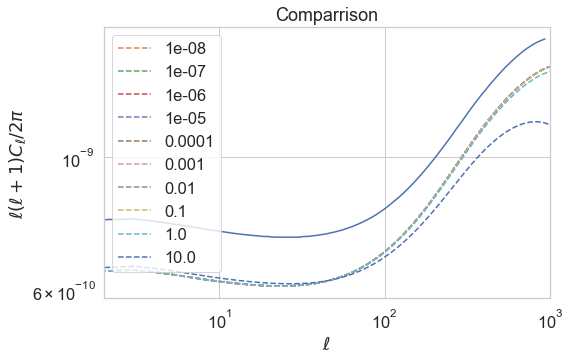

In [7]:
# Comparisson
plt.figure()
plt.title('Comparrison')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 12
plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i+1])
for tau in tau_ini_gwb:
    plt.plot(ell, gwcl[tau], '--', label=tau)
plt.legend()

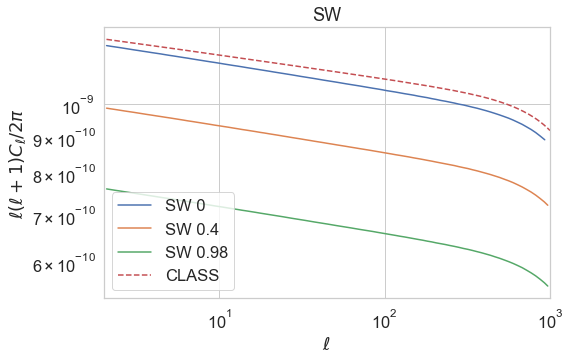

In [8]:
# SW
plt.figure()
plt.title('SW')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 6, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['tsw'], '--', label='CLASS')
plt.legend()

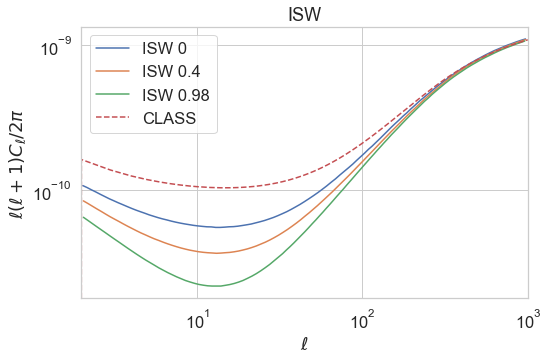

In [9]:
# ISW
plt.figure()
plt.title('ISW')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xscale('log'); plt.yscale('log')
plt.xlim([2,l_max])
for i in range(6, 12, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['isw'], '--', label='CLASS')
plt.legend()

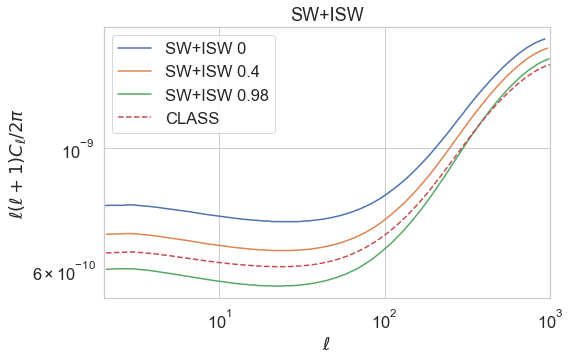

In [10]:
# SW+ISW
plt.figure()
plt.title('SW+ISW')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(12, 18, 2):
    plt.plot(data_rel_par[i], data_rel_par[i+1], label=label_rel_par[i])
plt.plot(ell, gwcl['tsw+isw'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Cross-correlating CGWB and CMB"

In [23]:
#Data of cross-cor.
l_max = 1000
data_cross_cor = np.genfromtxt('../output/cross_cor.csv', skip_header=2, delimiter=',').T
label_cross_cor = np.genfromtxt('../output/cross_cor.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    # 'temperature_contributions':'tsw, eisw, lisw', #don't include doppler effect!
    'temperature_contributions':'tsw',
    # 'gravitational_wave_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'tsw',
    'tau_ini_gwb':1e-2,
    # 'tau_ini_gwb':50,
    'convert_gwb_to_energydensity':'yes',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
tgwcl = {}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
# tau_ini_gwb = np.linspace(50, 100, 6)
# tau_ini_gwb = np.linspace(10, 60, 6)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    tgwcl.update({tau: factor * cl['tgwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'FSMxISW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'eisw, lisw',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'ISWxISW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'FSMxFSM': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'eisw, lisw',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'ISWxFSM': factor * cl['tgwb']})
M.empty()

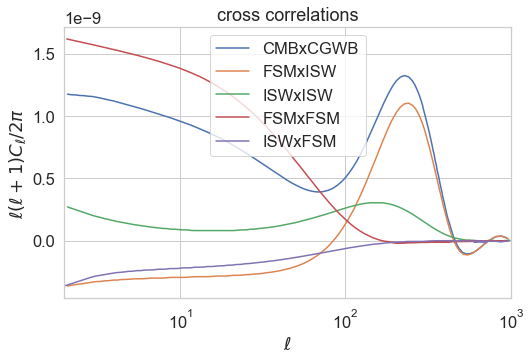

In [21]:
# original plot
plt.figure()
plt.title('cross correlations')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 10, 2):
    plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.legend()

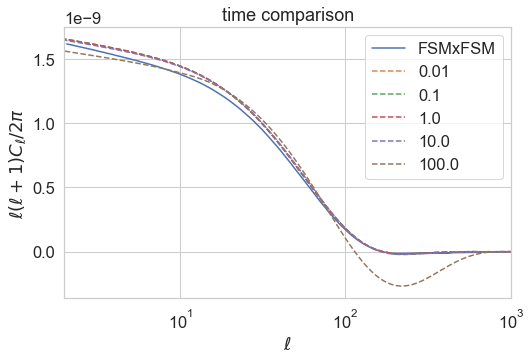

In [24]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 6
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
for tau in tau_ini_gwb:
    plt.plot(ell, tgwcl[tau], '--', label=tau)
plt.legend()

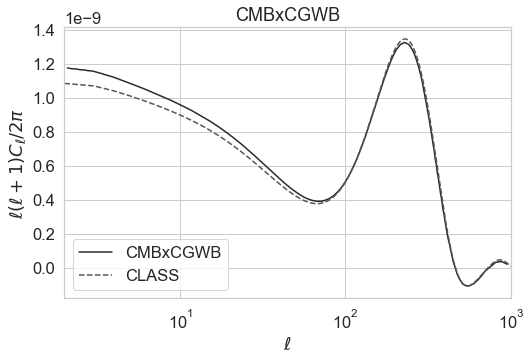

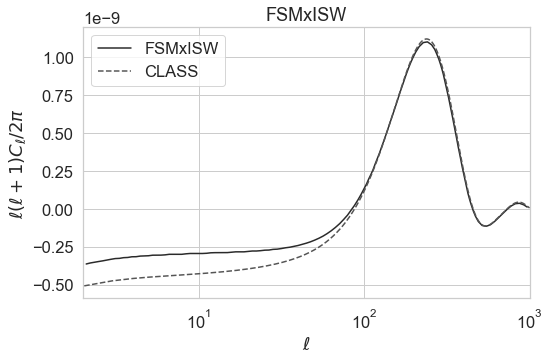

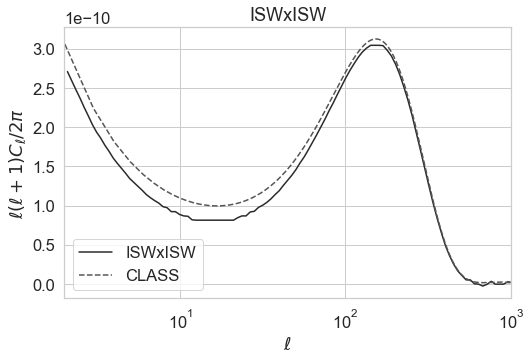

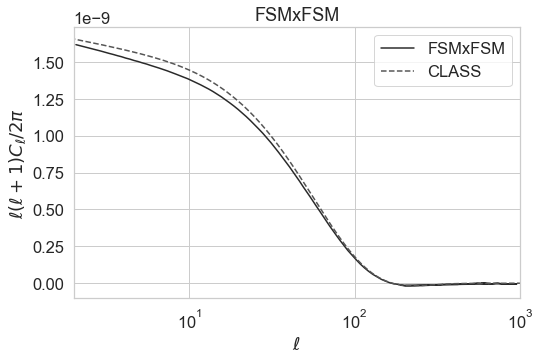

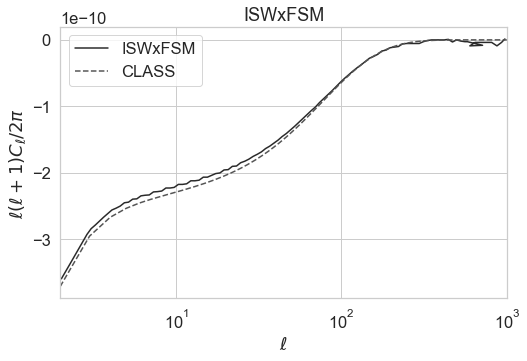

In [43]:
# comparison plots
plt.figure()
plt.title('CMBxCGWB')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('FSMxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['FSMxISW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('ISWxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 4
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['ISWxISW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('FSMxFSM')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 6
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['FSMxFSM'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('ISWxFSM')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 8
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['ISWxFSM'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Cross-correlating - include Doppler effect"

In [15]:
#Data of cross-cor.-dop
l_max = 1000
data_cross_cor = np.genfromtxt('../output/cross_cor_dop.csv', skip_header=2, delimiter=',').T
label_cross_cor = np.genfromtxt('../output/cross_cor_dop.csv', max_rows=1, delimiter=',', dtype=str)

#Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    'temperature_contributions':'tsw, eisw, lisw, dop', #include doppler effect!
    'gravitational_wave_contributions':'tsw, eisw, lisw',
    'tau_ini_gwb':1e-2,
    # 'tau_ini_gwb':50,
    'convert_gwb_to_energydensity':'yes',
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
tgwcl = {}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
tau_ini_gwb = np.linspace(50, 100, 6)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    tgwcl.update({tau: factor * cl['tgwb']})
    M.empty()

#different contributions
M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw, dop',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB w Doppler': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'tsw, eisw, lisw',
    'gravitational_wave_contributions':'tsw, eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'CMBxCGWB no Doppler': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'dop',
    'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'DOPxSW': factor * cl['tgwb']})
M.empty()

M.set(common_settings)
M.set({
    'temperature_contributions':'dop',
    'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
tgwcl.update({'DOPxISW': factor * cl['tgwb']})
M.empty()

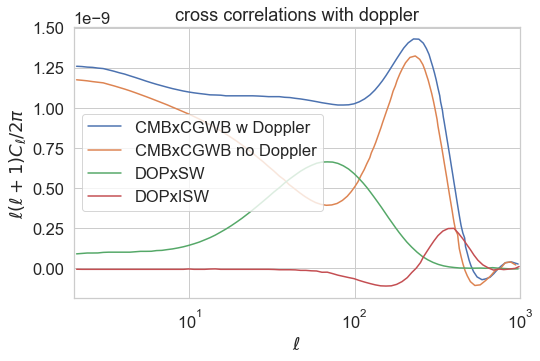

In [16]:
# original plot
plt.figure()
plt.title('cross correlations with doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 8, 2):
    plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.legend()

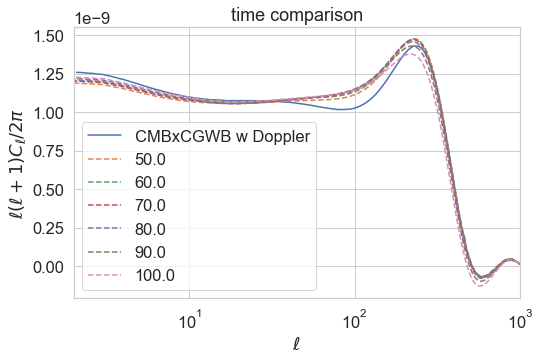

In [17]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
for tau in tau_ini_gwb:
    plt.plot(ell, tgwcl[tau], '--', label=tau)
plt.legend()

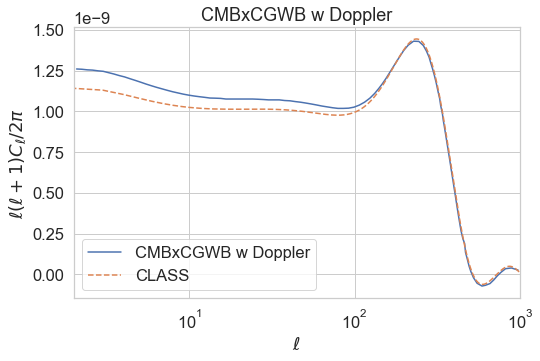

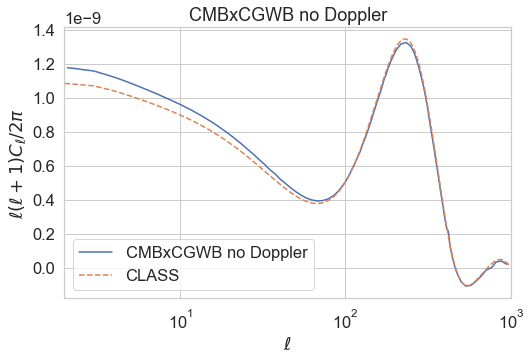

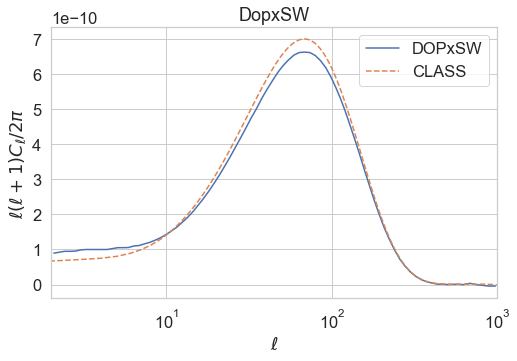

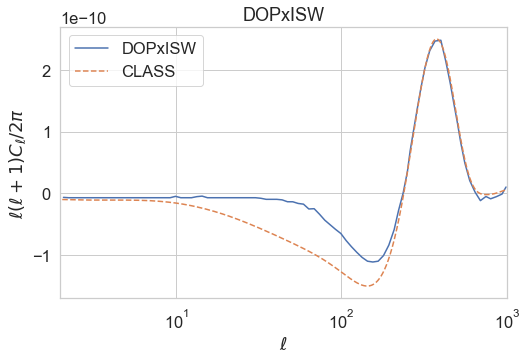

In [18]:
# comparison plots
plt.figure()
plt.title('CMBxCGWB w Doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 0
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB w Doppler'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('CMBxCGWB no Doppler')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['CMBxCGWB no Doppler'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('DopxSW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 4
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['DOPxSW'], '--', label='CLASS')
plt.legend()

plt.figure()
plt.title('DOPxISW')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 6
plt.plot(data_cross_cor[i], data_cross_cor[i+1], label=label_cross_cor[i])
plt.plot(ell, tgwcl['DOPxISW'], '--', label='CLASS')
plt.legend()

# Reproduce plots from "Anisotropy of phase transition GW"

In [3]:
#Data of phase tans.
l_max = 20000
l_max = 1000
data_phase_trans = np.genfromtxt('../output/phase_trans.csv', skip_header=2, delimiter=',').T
label_phase_trans = np.genfromtxt('../output/phase_trans.csv', max_rows=1, delimiter=',', dtype=str)

# Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    'gravitational_wave_contributions':'tsw, eisw, lisw, ini',
    'tau_ini_gwb':10,
    'factor_gwb_ini_scalar': -1, #the value they state
    # 'factor_gwb_ini_scalar': -1/3, #this should be the correct value
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
cls = {'CMB': factor * cl['tt'], 'CGWB': factor * cl['gwb']}

#different times
tau_ini_gwb = np.logspace(-2, 2, 5)
tau_ini_gwb = np.linspace(0.1, 1, 5)
for tau in tau_ini_gwb:
    M.set(common_settings)
    M.set({'tau_ini_gwb': tau})
    M.compute()
    cl = M.raw_cl(l_max)
    cls.update({tau: factor * cl['gwb']})
    M.empty()

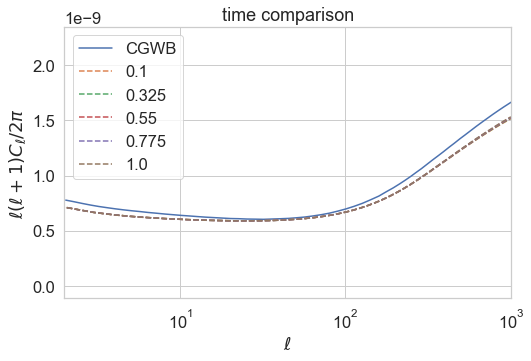

In [118]:
# time comparison
plt.figure()
plt.title('time comparison')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 2
plt.plot(data_phase_trans[i], data_phase_trans[i+1], label=label_phase_trans[i])
for tau in tau_ini_gwb:
    plt.plot(ell, cls[tau], '--', label=tau)
plt.legend()

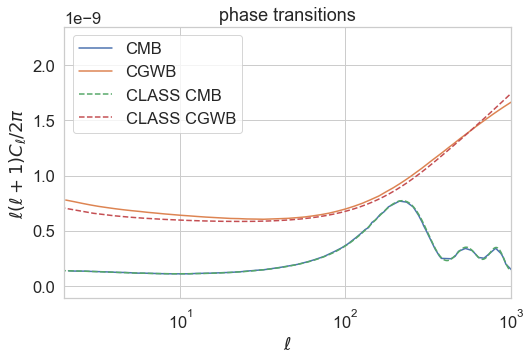

In [120]:
#plot with l_max
plt.figure()
plt.title('phase transitions')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 4, 2):
    plt.plot(data_phase_trans[i], data_phase_trans[i+1], label=label_phase_trans[i])
plt.plot(ell, cls['CMB'], '--', label='CLASS CMB')
plt.plot(ell, cls['CGWB'], '--', label='CLASS CGWB')
plt.legend()

# Reproduce plots from "Probing SGWB with LISA"

In [34]:
#Data of LISA_GGWB.
l_max = 1000
data_LISA = np.genfromtxt('../output/LISA_CGWB.csv', skip_header=2, delimiter=',').T
label_LISA = np.genfromtxt('../output/LISA_CGWB.csv', max_rows=1, delimiter=',', dtype=str)

gwcl = {}
#Computation with Class
common_settings = {
    'output':'tCl, gwCl',
    'temperature_contributions': 'tsw',
    'tau_ini_gwb':1e-2,
    'l_max_scalars':l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
gwcl.update({'CGWB TOT': factor * cl['gwb']})
gwcl.update({'CGWB': factor * cl['gwb']})
gwcl.update({'CMB': factor * cl['tt']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions':'tsw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'CGWB SW': factor * cl['gwb']})
M.empty()

M.set(common_settings)
M.set({'gravitational_wave_contributions':'eisw, lisw'})
M.compute()
cl = M.raw_cl(l_max)
gwcl.update({'CGWB ISW': factor * cl['gwb']})
M.empty()

#parameter comparison
# tau_ini_gwb = np.logspace(-2, 2, 5)
# tau_ini_gwb = np.linspace(50, 100, 6)
label = 'n_s'
values = np.linspace(0.95, 1, 5)
# label = 'k_max_tau0_over_l_max'
# values = [2.4, 4, 10]
# values = [0.24, 0.4, 2.4]
for x in values:
    M.set(common_settings)
    M.set({
        # 'output': 'tCl',
        # 'gravitational_wave_contributions':'eisw, lisw',
        'gravitational_wave_contributions':'tsw',
        label: x})
    M.compute()
    cl = M.raw_cl(l_max)
    # gwcl.update({x: factor * cl['gwb']})
    gwcl.update({x: factor * cl['tt']})
    M.empty()

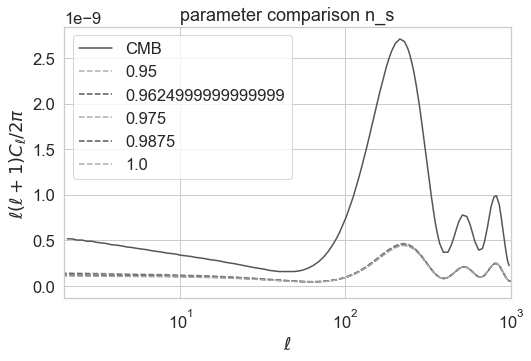

In [35]:
# time comparison
plt.figure()
plt.title('parameter comparison %s' % label)
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
i = 8
plt.plot(data_LISA[i], data_LISA[i+1], label=label_LISA[i])
for x in values:
    plt.plot(ell, gwcl[x], '--', label=x)
plt.legend()

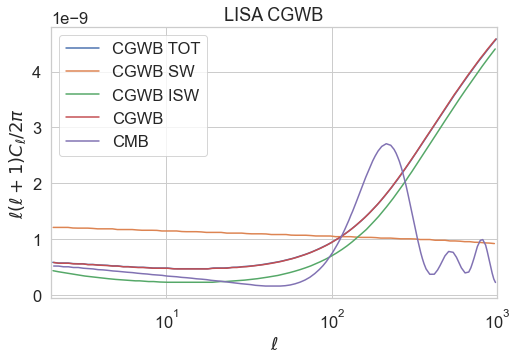

In [15]:
# original plot
plt.figure()
plt.title('LISA CGWB')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(0, 10, 2):
    plt.plot(data_LISA[i], data_LISA[i+1], label=label_LISA[i])
plt.legend()

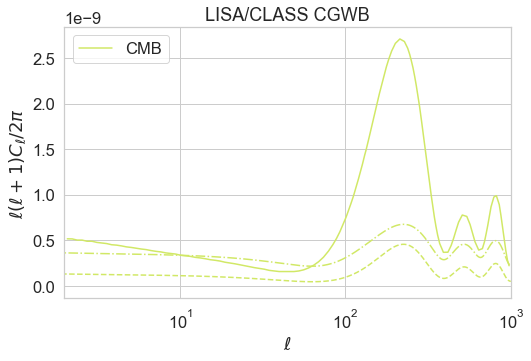

In [66]:
# comparison plots
color = sns.color_palette('summer', n_colors=10)

plt.figure()
plt.title('LISA/CLASS CGWB')
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
for i in range(8, 10, 2):
    plt.plot(data_LISA[i], data_LISA[i+1], label=label_LISA[i], color=color[i])
    plt.plot(ell, gwcl[label_LISA[i]], '--', color=color[i])
    plt.plot(ell, ((gwcl[label_LISA[i]]/1e-9)**(1/2))*1e-9, '-.', color=color[i])
plt.legend()

# Analytic formulations for SW and ISW

In [4]:
from scipy.special import gamma
from scipy.special import spherical_jn
from scipy.special import hyp2f1

from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [33]:
#set parameter CLASS
l_max = 1000
l_max_scalars = 1000
tau_ini_gwb = 1e-2 # in Mpc
factor_ini = 0.333
n_s = 0.9660499
n_s = 1.1
A_s = 2.100549e-09
k_pivot = 0.05
k_min = 1e-7
k_max = 1e-2
tau_0 = 1.4e4
tau_0 = 1.415190e+04 #Hacky hard codes way
cls = {}

## Problem with INI/SW: l_max dependence

In [33]:
"""analytic ecprerssion for SW"""
def analytic_SW(l, n):
    return gamma(l+n/2-1/2) * gamma(3-n) / (gamma(l+5/2-n/2) * np.power(gamma(2-n/2), 2)) \
        * np.power(2, n-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n) \
        * factor_ini**2 * 9

def analytic_SW2(l, n):
    return gamma(l+n/2-1/2) * hyp2f1(n/2-1, l+n/2-1/2, l+3/2, 1) / (gamma(l+3/2) * gamma(2-n/2)) \
        * np.power(2, n-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n) \
        * factor_ini**2 * 9

def transfer(x, l, tau0, tau_ini):
    return spherical_jn(l, x * (tau0 - tau_ini)) * factor_ini

In [40]:
"Precision parameter"
# label = 'output'
# values = ['gwCl', 'gwCl, tCl']

label = 'l_max_scalars'
values = [100, 500, 1000, 2000, 3000, 4000, 5000] #TODO_GWB: problem with tsw!!!
values = [100, 500, 1000]

# label = 'tau_ini_gwb'
# values = np.logspace(-2, 2, 5)
# values = np.logspace(-6, -1, 6)

# label = 'start_small_k_at_tau_c_over_tau_h'
# values = [0.0015, 0.005, 0.0005]
# label = 'start_sources_at_tau_c_over_tau_h'
# values = [0.008, 0.005, 0.0005]

ells = {}
cls = {}
k_min = np.empty(len(values))
k_max = np.empty(len(values))
M = Class()

common_settings = {
    'output':'gwCl',
    'gravitational_wave_contributions':'ini',
    'tau_ini_gwb':tau_ini_gwb,
    'factor_gwb_ini_scalar': factor_ini,
    'l_max_scalars':l_max_scalars,
    'k_pivot': k_pivot,
    'A_s': A_s,
    'n_s': n_s,
    # 'k_max_tau0_over_l_max': 10, #The parameter that solves the problem!
    # 'k_max_tau0_over_l_max': 0.24, #restore old polts
    'write_warnings':'yes'}


for i, x in enumerate(values):
    M.set(common_settings)
    M.set({label: x})
    M.compute()
    l_max = x
    cl = M.raw_cl(l_max)
    ell = cl['ell']
    ells.update({x: ell})
    factor = ell*(ell+1.) / (2 * np.pi)
    cls.update({x: factor * cl['gwb']})
    cls.update({'analytic '+str(x): factor * analytic_SW2(ell, n_s)})

    prim = M.get_primordial()
    k_min[i] = prim['k [1/Mpc]'][0]
    k_max[i] = prim['k [1/Mpc]'][-1]
    M.empty()

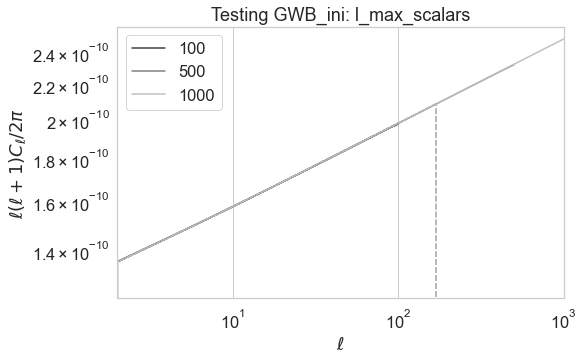

In [41]:
# comparison plots
sns.set_palette("gray", len(values))
plt.figure()
plt.title('Testing GWB_ini: %s' % label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

for x in values:
    plt.plot(ells[x], cls[x], label=x)
for x in values:
    plt.plot(ells[x], cls['analytic '+str(x)], '--')

plt.legend()

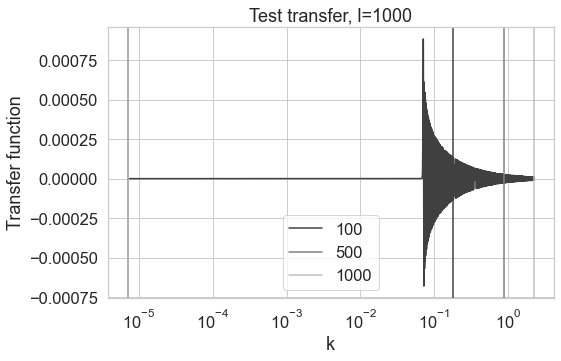

In [7]:
l = 1000
l = values[-1]
k = np.logspace(np.log10(min(k_min)), np.log10(max(k_max)), 10000)
    

color = sns.color_palette()
plt.figure()
plt.title("Test transfer, l=%i" % l)
plt.xscale('log')
plt.xlabel(r"k")
plt.ylabel("Transfer function")
# plt.xlim([min(k_min), max(k_max)])

plt.plot(k, transfer(k, l, tau_0, tau_ini_gwb))
for i, x in enumerate(values):
    plt.axvline(k_min[i], color=color[i], label=x)
    plt.axvline(k_max[i], color=color[i])
    
plt.legend()

## SW+INI detailed Testing

In [24]:
data_class = np.genfromtxt('../output/test.dat', delimiter=',', skip_header=2, skip_footer=8)
data_class = data_class[data_class[:, 0].argsort(kind='stable')]
l_size = (int) (data_class[:, 0].max()) + 1
k_size = (int) (data_class[:, 1].max()) + 1
data_class = data_class.reshape((l_size, k_size, 9))

factor_class2 = data_class[:,0,2]*(data_class[:,0,2]+1.) / (2 * np.pi)

cl_class2_test = np.genfromtxt('../output/test_cl.dat').T

In [56]:
#run CLASS
common_settings = {
    'output':'gwCl',
    'gravitational_wave_contributions':'tsw, ini',
    'tau_ini_gwb':tau_ini_gwb,
    # 'factor_gwb_ini_scalar': -1., #the value they state
    'factor_gwb_ini_scalar': 1/3, #this should be the correct value
    'l_max_scalars':l_max,
    'k_pivot': k_pivot,
    'A_s': A_s,
    'n_s': n_s,
    # 'k_max_tau0_over_l_max': 1e3,
    # 'transfer_verbose': 2,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
cls.update({'CLASS SW+INI': factor * cl['gwb'][2:]})


M.set(common_settings)
M.set({
    'gravitational_wave_contributions':'ini',
    # 'factor_gwb_ini_scalar': 1/3})
    'factor_gwb_ini_scalar': factor_ini})
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
# tau_0 = M.age() * Gyr_over_Mpc #No easy way of tranforming to conformal age...
cls.update({'CLASS 1/3': factor * cl['gwb'][2:]})

print('tau_0 = %e\n' % tau_0)

tau_0 = 1.415190e+04



In [57]:
"""analytic ecprerssion for SW"""
def analytic_SW(l, n):
    return gamma(l+n/2-1/2) * gamma(3-n) / (gamma(l+5/2-n/2) * np.power(gamma(2-n/2), 2)) \
        * np.power(2, n-2) * np.pi**2 / 9 * A_s * np.power(k_pivot * (tau_0-tau_ini_gwb), 1-n) \
        * factor_ini**2 * 9


# TODO_GWB: implement other language - python get overflows!

cls.update({'analytic SW': factor * analytic_SW(ell, n_s)})

NameError: name 'cl_class2_test' is not defined

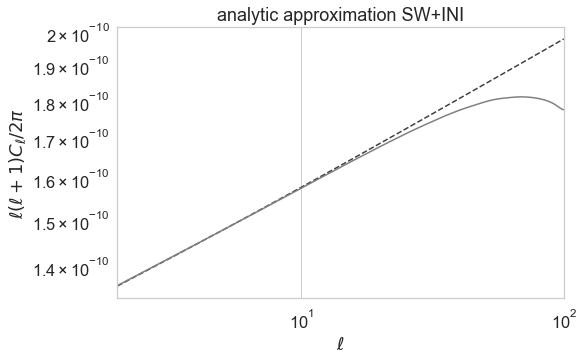

In [58]:
#plot
plt.figure()
plt.title('analytic approximation SW+INI')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
plt.plot(ell, cls['analytic SW'], '--', label='analytic SW')
# plt.plot(ell, cls['CLASS SW+INI'], '-', label='CLASS SW+INI')
plt.plot(ell, cls['CLASS 1/3'], '-', label='CLASS 1/3')
plt.plot(cl_class2_test[0], cl_class2_test[1], '-', label='CLASS 2 Test')
plt.legend()

# TODO_GWB: maybe problems with the power spectrum?

# cls['analytic SW'] / cls['CLASS 1/3']

7.066189996503675e-06 0.17749466774686318
7.066189996503675e-06 0.17749466774686318


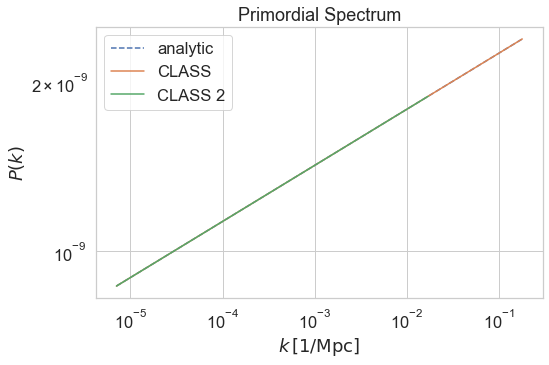

In [28]:
"""analytic primordial pectrum"""
def analytic_prim(k, A, n, kp):
    return A * np.power(k/kp, n-1)

prim = M.get_primordial()
k = prim['k [1/Mpc]']
k_min = k[0]; k_max = k[-1]
print(k_min, k_max)
# k_max *= 1e5
print(k_min, k_max)
k2 = np.logspace(np.log10(k_min), np.log10(k_max), 10000)
# k2 = k2 * 1e3
# k2 = k
prim_class = prim['P_scalar(k)']
prim_ana = analytic_prim(k2, A_s, n_s, k_pivot)


plt.figure()
plt.title('Primordial Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k \, [1/\mathrm{Mpc}]$")
plt.ylabel(r"$P(k)$")

plt.plot(k2, prim_ana, '--', label='analytic')
plt.plot(k, prim_class, '-', label='CLASS')
plt.plot(data_class[0,:,4], data_class[0,:,5], '-', label='CLASS 2')

plt.legend()

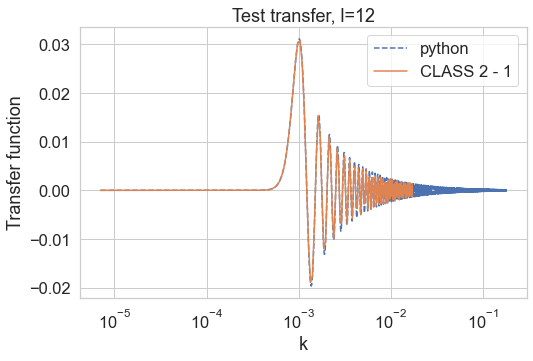

In [29]:
scaling1 = 1e3
scaling1 = 1

def transfer(x, l, tau0, tau_ini):
    return spherical_jn(l, x * (tau0 - tau_ini) * scaling1) * factor_ini

index_l = 10
l = (int) (data_class[index_l,0,2])
plt.figure()
plt.title("Test transfer, l=%i" % l)
plt.xscale('log')
plt.xlabel(r"k")
plt.ylabel("Transfer function")
plt.plot(k2, transfer(k2, l, tau_0, tau_ini_gwb), '--', label='python')
plt.plot(data_class[index_l,:,4], data_class[index_l,:,6], label='CLASS 2 - 1')
# plt.plot(data_class[index_l,:,4], data_class[index_l,:,7], label='CLASS 2 - 2')
plt.legend()

In [30]:
#Integrate by hand
def integrand(x, l, A, n, kp, tau0, tau_ini):
    return 4*np.pi/x  * analytic_prim(x, A, n, kp) \
        * np.power(transfer(x, l, tau0, tau_ini), 2)

cl_int = np.empty(ell.size)
for i, l in enumerate(ell):
    y = integrand(k, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb)
    cl_int[i] = np.trapz(y, k)

cl_int2 = np.empty(ell.size)
for i, l in enumerate(ell):
    y = integrand(k2, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb)
    cl_int2[i] = np.trapz(y, k2)

integrand_class2 = np.empty((l_size, k_size))
cl_class2 = np.empty(l_size)
for i in range(l_size):
    integrand_class2[i] = 4*np.pi/data_class[i,:,4] * data_class[i,:,5] * (data_class[i,:,6]*data_class[i,:,7])
    cl_class2[i] = np.trapz(integrand_class2[i], data_class[i,:,4])


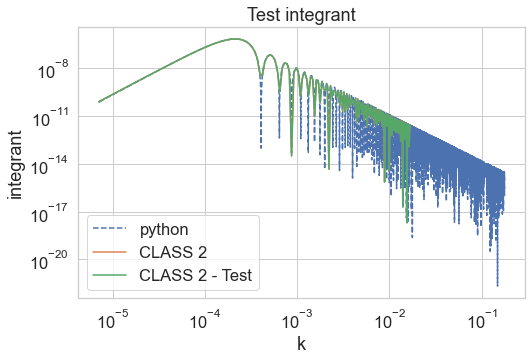

In [31]:
index_l = 0
l = (int) (data_class[index_l,0,2])
plt.figure()
plt.title('Test integrant')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"k")
plt.ylabel("integrant")
plt.plot(k2, integrand(k2, l, A_s, n_s, k_pivot, tau_0, tau_ini_gwb), '--', label='python')
plt.plot(data_class[index_l,:,4], integrand_class2[index_l], '-', label='CLASS 2')
plt.plot(data_class[index_l,:,4], data_class[index_l,:,8], '-', label='CLASS 2 - Test')
plt.legend()

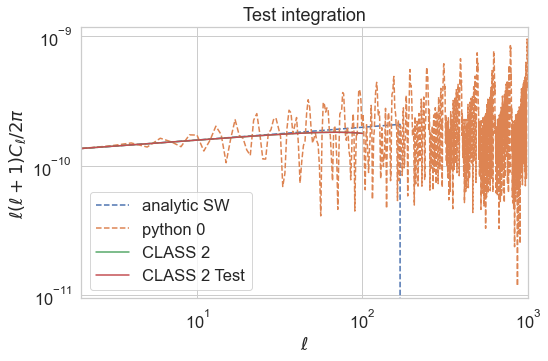

In [32]:
#plot
plt.figure()
plt.title('Test integration')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

plt.plot(ell, cls['analytic SW'], '--', label='analytic SW')
# plt.plot(ell, cls['CLASS 1/3'], '-', label='CLASS 1/3')
plt.plot(ell, factor*cl_int, '--', label='python 0')
# plt.plot(ell, factor*cl_int2, '--', label='pyhton')
plt.plot(data_class[:,0,2], factor_class2*cl_class2, '-', label='CLASS 2')
plt.plot(cl_class2_test[0], cl_class2_test[1], '-', label='CLASS 2 Test')

plt.legend()

## ISW

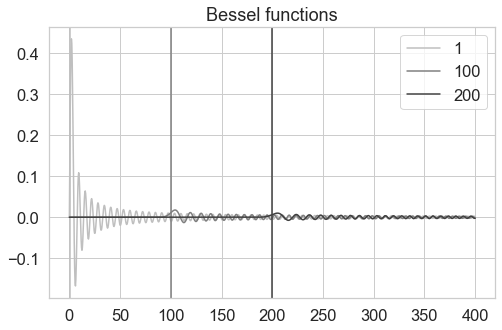

In [55]:
#plot Bessel functions -> Bessel supresses x < l
l = [1, 100, 200]
x = np.linspace(0, 400, 1000)

plt.figure()
color = sns.color_palette("gray_r", len(l))
plt.title("Bessel functions")
for i,n in enumerate(l):
    plt.plot(x, spherical_jn(n, x), color=color[i], label = n)
    plt.axvline(n, color=color[i])
plt.legend()


In [99]:
# Plots for phi, psi to understand analytic approximation


k = 100  # 1/Mpc
common_settings = {'output':'mPk, gwCl',
                   'k_output_values':k,
                   'gravitational_wave_contributions':'eisw, lisw',
                   'tau_ini_gwb':tau_ini_gwb,
                   'l_max_scalars':l_max,
                   'k_pivot': k_pivot,
                   'A_s': A_s,
                   'n_s': n_s,
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian'}  

M = Class()
M.set(common_settings)
M.compute()

all_k = M.get_perturbations()
# print (all_k['scalar'][0].keys())

one_k = all_k['scalar'][0]

tau = one_k['tau [Mpc]']
Theta0 = 0.25*one_k['delta_g']
phi = one_k['phi']
psi = one_k['psi']
theta_b = one_k['theta_b']
a = one_k['a']

R = 3./4.*M.Omega_b()/M.Omega_g()*a    # R = 3/4 * (rho_b/rho_gamma)
zero_point = -(1.+R)*psi               # zero point of oscillations: -(1.+R)*psi

Theta0_amp = max(Theta0.max(),-Theta0.min())

quantities = M.get_current_derived_parameters(['tau_rec'])
tau_rec = quantities['tau_rec']

# Hubble crossing (k / (aH)= 2 pi), sound horizon crossing (k * rs = 2pi)
background = M.get_background() # load background table
background_tau = background['conf. time [Mpc]'] # read confromal times in background table
background_z = background['z'] # read redshift
background_k_over_aH = k/background['H [1/Mpc]']*(1.+background['z']) # read k/aH = k(1+z)/H
background_k_rs = k * background['comov.snd.hrz.'] # read k * rs
background_rho_m_over_r =\
    (background['(.)rho_b']+background['(.)rho_cdm'])\
    /(background['(.)rho_g']+background['(.)rho_ur']) # read rho_r / rho_m (to find time of equality)

tau_at_k_over_aH = interp1d(background_k_over_aH,background_tau)
tau_at_k_rs = interp1d(background_k_rs,background_tau)
tau_at_rho_m_over_r = interp1d(background_rho_m_over_r,background_tau)

tau_Hubble = tau_at_k_over_aH(2.*math.pi)
tau_s = tau_at_k_rs(2.*math.pi)
tau_eq = tau_at_rho_m_over_r(1.)

cl = M.raw_cl(l_max)
ell = cl['ell'][2:]
factor = ell*(ell+1.) / (2 * np.pi)
M.empty()
cls.update({'CLASS ISW': factor * cl['gwb'][2:]})


/opt/homebrew/Caskroom/miniforge/base/envs/CLASS/lib/python3.9/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/homebrew/Caskroom/miniforge/base/envs/CLASS/lib/python3.9/site-packages/numpy/lib/function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/homebrew/Caskroom/miniforge/base/envs/CLASS/lib/python3.9/site-packages/numpy/lib/function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/homebrew/Caskroom/miniforge/base/envs/CLASS/lib/python3.9/site-packages/numpy/lib/function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


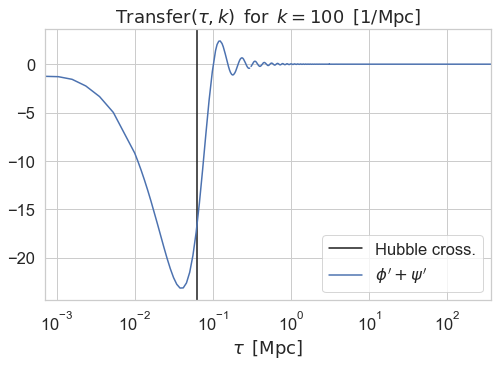

In [65]:
#plot for psi/phi -> confirm psi'+phi' approx -(psi+phi) delta(eta - eta_k)

plt.figure()
plt.title(r'$\mathrm{Transfer} (\tau,k) \,\,\, \mathrm{for} \,\,\, k=%g \,\,\, [1/\mathrm{Mpc}]$'%k)
plt.xlim([tau[0],tau_rec*1.3])
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.xscale('log')

plt.axvline(x=tau_Hubble, color='k', label='Hubble cross.')

# plt.plot(tau, psi, label=r'$\psi$')
# plt.plot(tau, phi, label=r'$\phi$')

# plt.plot(tau, np.gradient(phi, tau), label=r"$\phi'$")
# plt.plot(tau, np.gradient(psi, tau), label=r"$\psi'$")

plt.plot(tau, np.gradient(phi, tau) + np.gradient(psi, tau), label=r"$\phi' + \psi'$")
# plt.axhline(- (phi[0] + psi[0]), color='r', label=r"$- (\phi + \psi)(\tau_in)$")

plt.legend()

In [90]:
data_class = np.genfromtxt('../output/test.dat', delimiter=',', skip_header=2, skip_footer=8)
data_class = data_class[data_class[:, 0].argsort(kind='stable')]
l_size = (int) (data_class[:, 0].max()) + 1
k_size = (int) (data_class[:, 1].max()) + 1
data_class = data_class.reshape((l_size, k_size, 9))

factor_class2 = data_class[:,0,2]*(data_class[:,0,2]+1.) / (2 * np.pi)

cl_class2_test = np.genfromtxt('../output/test_cl.dat').T

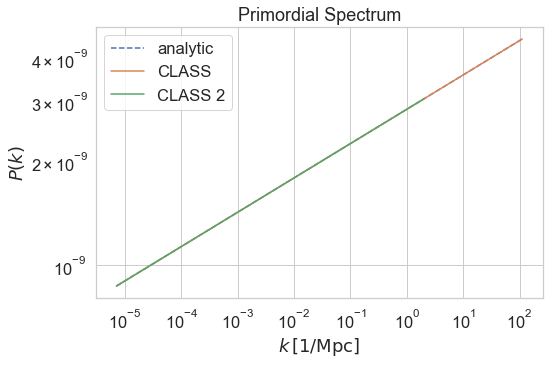

In [91]:
"""analytic primordial pectrum"""
def analytic_prim(k, A, n, kp):
    return A * np.power(k/kp, n-1)

prim = M.get_primordial()
k = prim['k [1/Mpc]']
k_min = k[0]; k_max = k[-1]
k2 = np.logspace(np.log10(k_min), np.log10(k_max), 10000)
prim_class = prim['P_scalar(k)']
prim_ana = analytic_prim(k2, A_s, n_s, k_pivot)

plt.figure()
plt.title('Primordial Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k \, [1/\mathrm{Mpc}]$")
plt.ylabel(r"$P(k)$")

plt.plot(k2, prim_ana, '--', label='analytic')
plt.plot(k, prim_class, '-', label='CLASS')
plt.plot(data_class[0,:,4], data_class[0,:,5], '-', label='CLASS 2')

plt.legend()

No handles with labels found to put in legend.


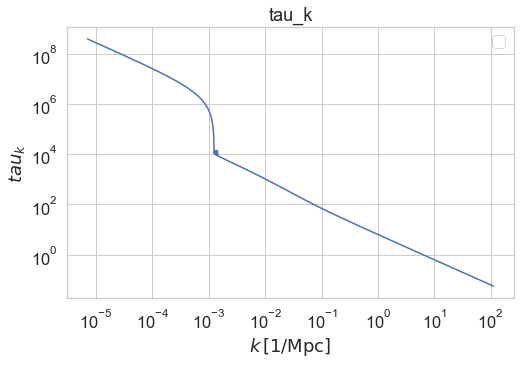

In [92]:

#calculate tau_ks
tau_ks = np.empty(len(k2))
for i, x in enumerate(k2):
    background_k_over_aH = x/background['H [1/Mpc]']*(1.+background['z']) # read k/aH = k(1+z)/H
    tau_at_k_over_aH = interp1d(background_k_over_aH,background_tau, bounds_error=False, fill_value="extrapolate")
    # tau_at_k_over_aH = interp1d(background_k_over_aH,background_tau, bounds_error=False, fill_value=0)
    tau_Hubble = tau_at_k_over_aH(2.*math.pi)
    tau_ks[i] = tau_Hubble

plt.figure()
plt.title('tau_k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k \, [1/\mathrm{Mpc}]$")
plt.ylabel(r"$tau_k$")

plt.plot(k2, tau_ks)

plt.legend()

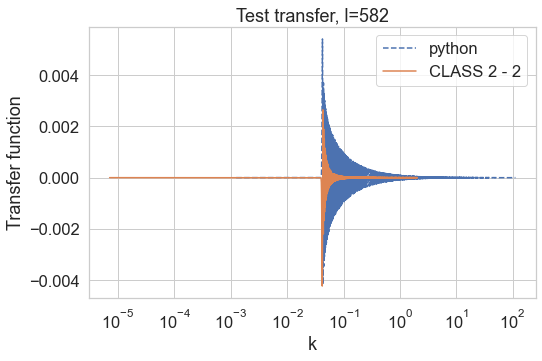

In [101]:
# Test the transfer function -> Very different!!

def transfer(x, l, tau0, tau_k):
    return spherical_jn(l, x * (tau0 - tau_k)) * (phi[0] + psi[0])

index_l = 50
l = (int) (data_class[index_l,0,2])
plt.figure()
plt.title("Test transfer, l=%i" % l)
plt.xscale('log')
plt.xlabel(r"k")
plt.ylabel("Transfer function")
plt.plot(k2, transfer(k2, l, tau_0, tau_ks), '--', label='python')
# plt.plot(data_class[index_l,:,4], data_class[index_l,:,6], label='CLASS 2 - 1')
plt.plot(data_class[index_l,:,4], data_class[index_l,:,7], label='CLASS 2 - 2')
plt.legend()

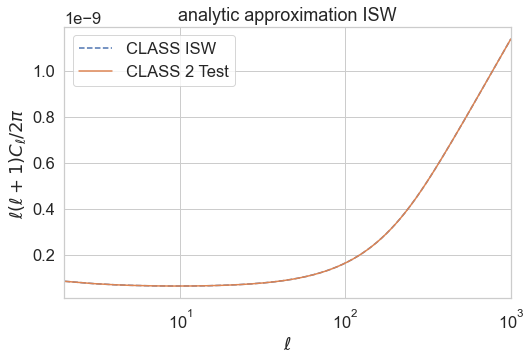

In [100]:
#plot
plt.figure()
plt.title('analytic approximation ISW')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])
plt.plot(ell, cls['CLASS ISW'], '--', label='CLASS ISW')
plt.plot(cl_class2_test[0], cl_class2_test[1], '-', label='CLASS 2 Test')
plt.legend()

# Plots for presentation

In [2]:
#Data from planck: http://pla.esac.esa.int/pla/#cosmology in D_l!!!
# data_planck = np.genfromtxt('../output/COM_PowerSpect_CMB-TT-full_R3.01.txt', skip_header=1).T
data_planck = np.genfromtxt('../output/COM_PowerSpect_CMB-TT-binned_R3.01.txt', skip_header=1).T

l_max = (int) (data_planck[0,-1])
common_settings = {
    'output':'tCl, gwCl',
    'tau_ini_gwb': 1e-2,
    'l_max_scalars': l_max,
    'write_warnings':'yes'}
M = Class()
M.set(common_settings)
M.compute()
cl = M.raw_cl(l_max)
ell = cl['ell']
factor = ell*(ell+1.) / (2 * np.pi)
T_cmb = M.T_cmb()
M.empty()

# D_l = l (l+1) C_l * (T_0)^2 / (2 pi) in [(1e-6 K)^2], T_0 = T_cmb = 2.7 K
data_planck[1:] *= (1e-6/T_cmb)**2

#TODO_GWB: plot real space interface

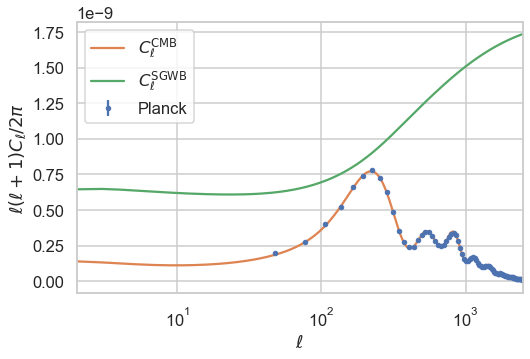

In [3]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure()
plt.xlim([2,l_max])
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")

#plot planck data
plt.errorbar(data_planck[0], data_planck[1], yerr=data_planck[2:4], fmt='.', label='Planck')
# plt.plot(data_planck[0], data_planck[4], label='best fit')

plt.plot(ell,factor*cl['tt'],label=r'$C_\ell^\mathrm{CMB}$')
plt.plot(ell,factor*cl['gwb'],label=r'$C_\ell^\mathrm{SGWB}$')
# plt.plot(ell,factor*cl['tgwb'],label=r'$C_\ell^\mathrm{TGWB}$')

plt.legend()
plt.savefig('../output/plot_Cl.pdf', bbox_inches='tight')

In [8]:
l_max = 2500
# l_max = 250
l_max_scalars = max(l_max, 1000)
tau_ini_gwb = 1e-2

"Physical parameter"
# label = 'h' #h = 0.67810
# values = np.linspace(0.5, 0.8, 5)

# label = 'omega_b' #omega_b = 0.02238280
# values = np.linspace(0.005, 0.035, 5)

# label = 'N_ur' #N_ur = 3.044
# values = np.linspace(3, 4, 5)

# label = 'omega_cdm' #omega_cdm = 0.1201075
# values = np.linspace(0.05, 0.25, 5)

# label = 'ln10^{10}A_s' #ln10^{10}A_s = 3.04478383
# values = np.linspace(2, 4, 5)

label = 'n_s' #n_s = 0.9660499
# values = np.linspace(0.9, 1.1, 5)
values = np.linspace(0.94, 0.98, 5)

# label = 'z_reio' #z_reio = 7.6711
# values = np.linspace(6, 8, 5)

cls = {}
tcls = {}
ells = {}
M = Class()

common_settings = {
    'output':'tCl, gwCl',
    'gravitational_wave_contributions':'tsw, eisw, lisw',
    'tau_ini_gwb':tau_ini_gwb,
    'l_max_scalars':l_max_scalars,
    'write_warnings':'yes'}


for x in values:
    M.set(common_settings)
    M.set({label: x})
    M.compute()
    # l_max = x
    cl = M.raw_cl(l_max)
    ell = cl['ell']
    ells.update({x: ell})
    factor = ell*(ell+1.) / (2 * np.pi)
    cls.update({x: factor * cl['gwb']})
    tcls.update({x: factor * cl['tt']})
    M.empty()

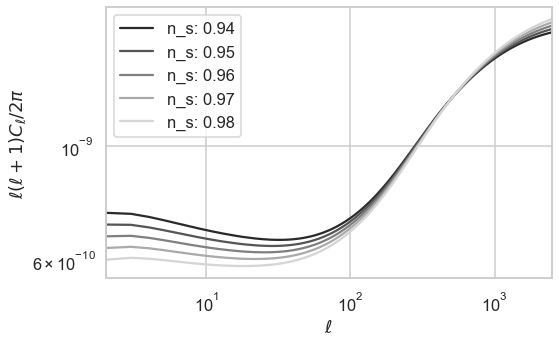

In [10]:
# comparison plots

sns.set_palette("gray", len(values))
plt.figure()
# plt.title('Comparison %s' % label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

for x in values:
    plt.plot(ells[x], cls[x], label='%s: %.2f' % (label, x))
    # plt.plot(ells[x], tcls[x], '--')

plt.legend()
plt.savefig("../output/comparision_presentation.png", bbox_inches='tight')

# Plots for parameter comparison

In [13]:
l_max = 2500
l_max = 1000
# l_max = 250
l_max_scalars = max(l_max, 1000)
tau_ini_gwb = 1e-2

"Precision parameter"
# label = 'output'
# values = ['gwCl', 'gwCl, tCl']

# label = 'gauge'
# values = ['newtonian', 'synchronous']

# label = 'l_max_scalars'
# values = [100, 500, 1000, 2000, 3000, 4000, 5000]

# label = 'tau_ini_gwb'
# values = np.logspace(-2, 2, 5)
# values = np.logspace(-6, -1, 6)

# label = 'start_small_k_at_tau_c_over_tau_h'
# values = [0.0015, 0.005, 0.0005]
# label = 'start_sources_at_tau_c_over_tau_h'
# values = [0.008, 0.005, 0.0005]

# label = 'k_max_tau0_over_l_max' #2.4 is the normal value, gwb takes this *5
# values = 2.4 / 5 * np.linspace(2, 6, 5)

label = 'perturbations_sampling_stepsize' #0.1
# values = [0.1, 0.01]
# values = [0.1, 0.01, 0.001] #takes 4 mins
values = [0.5, 0.1] #not convergent

"Physical parameter"
# label = 'gravitational_wave_contributions'
# values = ['tsw', 'eisw', 'lisw', 'eisw, lisw']
# values = ['tsw', 'eisw, lisw']

# label = 'h' #h = 0.67810
# values = np.linspace(0.5, 0.8, 5)

# label = 'omega_b' #omega_b = 0.02238280
# values = np.linspace(0.005, 0.035, 5)

# label = 'N_ur' #N_ur = 3.044
# values = np.linspace(3, 3.5, 6)

# label = 'omega_cdm' #omega_cdm = 0.1201075
# values = np.linspace(0.05, 0.25, 5)

# label = 'ln10^{10}A_s' #ln10^{10}A_s = 3.04478383
# values = np.linspace(2, 4, 5)

# label = 'n_s' #n_s = 0.9660499 or n_s = 0.9649 ± 0.0042
# values = np.linspace(0.9649-0.004, 0.9649+0.004, 5)

# label = 'z_reio' #z_reio = 7.6711
# values = np.linspace(6, 8, 5)

gwcls = {}
cmbcls = {}
ells = {}
M = Class()

common_settings = {
    'output':'tCl, gwCl',
    # 'output':'gwCl',
    'gravitational_wave_contributions':'tsw, eisw, lisw',
    # 'gravitational_wave_contributions':'tsw',
    # 'gravitational_wave_contributions':'eisw, lisw',
    'tau_ini_gwb':tau_ini_gwb,
    'l_max_scalars':l_max_scalars,
    'write_warnings':'yes'}


for x in values:
    M.set(common_settings)
    M.set({label: x})
    M.compute()
    # l_max = x
    cl = M.raw_cl(l_max)
    ell = cl['ell']
    ells.update({x: ell})
    factor = ell*(ell+1.) / (2 * np.pi)
    gwcls.update({x: factor * cl['gwb']})
    cmbcls.update({x: factor * cl['tt']})
    M.empty()

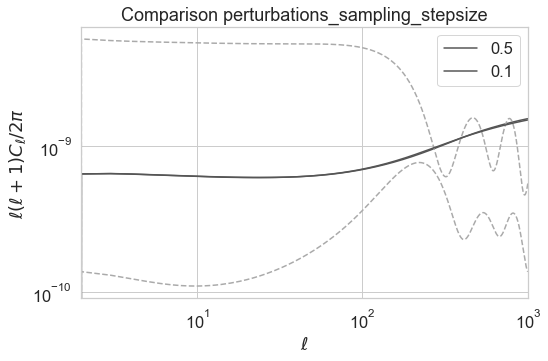

In [14]:
# comparison plots
sns.set_palette("gray", len(values))
plt.figure()
plt.title('Comparison %s' % label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_\ell / 2 \pi$")
plt.xlim([2,l_max])

for x in values:
    plt.plot(ells[x], gwcls[x], label=x)
    plt.plot(ells[x], cmbcls[x], '--')

plt.legend()
# plt.savefig("../output/comparision_%s.png" % label, bbox_inches='tight')